In [2]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import shutil

original = r'./gdrive/MyDrive/Pooja.zip'
target = r'./'

shutil.move(original, target)

In [4]:
!unzip Pooja.zip

Archive:  Pooja.zip
   creating: Pooja/.ipynb_checkpoints/
  inflating: Pooja/.ipynb_checkpoints/BF and FD-checkpoint.ipynb  
  inflating: Pooja/Best Frame Document.docx  
  inflating: Pooja/BF and FD.ipynb   
   creating: Pooja/data/
  inflating: Pooja/data/Frame.png    
   creating: Pooja/Face Detected/
  inflating: Pooja/Face Detected/Detected.png  
   creating: Pooja/Face Extracted/
  inflating: Pooja/Face Extracted/Extracted.jpg  
   creating: Pooja/model/
  inflating: Pooja/model/frozen_inference_graph.pb  
   creating: Pooja/proto/
 extracting: Pooja/proto/__init__.py  
   creating: Pooja/proto/__pycache__/
  inflating: Pooja/proto/__pycache__/__init__.cpython-35.pyc  
  inflating: Pooja/proto/__pycache__/__init__.cpython-39.pyc  
  inflating: Pooja/proto/__pycache__/string_int_label_map_pb2.cpython-35.pyc  
  inflating: Pooja/proto/__pycache__/string_int_label_map_pb2.cpython-39.pyc  
 extracting: Pooja/proto/label_map.pbtxt  
  inflating: Pooja/proto/string_int_label_map_pb2.p

In [ ]:
original = r'./Pooja/Face Detected'
target = r'./'
shutil.move(original, target)
original = r'./Pooja/Face Extracted'
target = r'./'
shutil.move(original, target)
original = r'./Pooja/Videos'
target = r'./'
shutil.move(original, target)
original = r'./Pooja/data'
target = r'./'
shutil.move(original, target)
original = r'./Pooja/model'
target = r'./'
shutil.move(original, target)
original = r'./Pooja/proto'
target = r'./'
shutil.move(original, target)
original = r'./Pooja/utils'
target = r'./'
shutil.move(original, target)

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
cap = cv2.VideoCapture(r'./Videos/2.mp4') 

arr = np.empty((0, 1944), int)   #initializing 1944 dimensional array to store 'flattened' color histograms
D=dict()   #to store the original frame (array)
count=0    #counting the number of frames
start_time = time.time()
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames.
    if ret == True:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  #since cv reads frame in bgr order so rearraning to get frames in rgb order
        D[count] = frame_rgb   #storing each frame (array) to D , so that we can identify key frames later 
        
        #dividing a frame into 3*3 i.e 9 blocks
        height, width, channels = frame_rgb.shape

        if height % 3 == 0:
            h_chunk = int(height/3)
        else:
            h_chunk = int(height/3) + 1

        if width % 3 == 0:
            w_chunk = int(width/3)
        else:
            w_chunk = int(width/3) + 1

        h=0
        w= 0 
        feature_vector = []
        for a in range(1,4):
            h_window = h_chunk*a
            for b in range(1,4):
                frame = frame_rgb[h : h_window, w : w_chunk*b , :]
                hist = cv2.calcHist(frame, [0, 1, 2], None, [6, 6, 6], [0, 256, 0, 256, 0, 256])#finding histograms for each block  
                hist1= hist.flatten()  #flatten the hist to one-dimensinal vector 
                feature_vector += list(hist1)
                w = w_chunk*b
                
            h = h_chunk*a
            w= 0

                
        arr =np.vstack((arr, feature_vector )) #appending each one-dimensinal vector to generate N*M matrix (where N is number of frames
          #and M is 1944) 
        count+=1
    else:
        break

print("--- %s seconds ---" % (time.time() - start_time))

final_arr = arr.transpose() #transposing so that i will have all frames in columns i.e M*N dimensional matrix 
#where M is 1944 and N is number of frames
print(final_arr.shape)
print(count)

--- 1.9265167713165283 seconds ---
(1944, 219)
219


In [3]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs
A = csc_matrix(final_arr, dtype=float)

#top 63 singular values from 76082 to 508
u, s, vt = svds(A, k = 63)

In [4]:
print(u.shape, s.shape, vt.shape)

(1944, 63) (63,) (63, 219)


In [5]:
print(list(s))

[43.6646569372721, 44.7836949655014, 45.46390757897461, 46.10920229811292, 48.33798312706896, 49.40353389841625, 50.88297237078016, 51.23248491594354, 52.635779680607094, 54.5287753982436, 55.21637558856007, 55.7853997714104, 57.738136177659996, 60.281279370021366, 61.539202080297166, 62.94024088201737, 65.7382256794039, 67.13890045664577, 71.14637980858153, 72.63034476965537, 74.87979820300687, 78.09934116786793, 79.65870322864642, 83.64696033231657, 86.98683626507916, 89.46241368313815, 93.50409606691073, 94.260096801158, 99.69212170253206, 101.41341582942016, 107.21680681107989, 107.65332560661915, 109.92958591186411, 115.00446976724598, 116.2567868954312, 124.46014099858209, 129.80996208066097, 135.57790817237253, 143.3930986184509, 154.63435599116298, 161.24925230223144, 169.45303143271897, 178.4856510404373, 200.03046457592126, 214.9754602648378, 224.1648616640319, 240.61095351157684, 261.68622382033504, 290.26602619570093, 322.69935966167805, 386.87423891998986, 389.738146470972

In [6]:
v1_t = vt.transpose()

projections = v1_t @ np.diag(s) #the column vectors i.e the frame histogram data has been projected onto the orthonormal basis 
#formed by vectors of the left singular matrix u .The coordinates of the frames in this space are given by v1_t @ np.diag(s)
#So we can see that , now we need only 63 dimensions to represent each column/frame 
print(projections.shape)

(219, 63)


In [7]:
#dynamic clustering of projected frame histograms to find which all frames are similar i.e make shots
f=projections
C = dict() #to store frames in respective cluster
for i in range(f.shape[0]):
    C[i] = np.empty((0,63), int)
    
#adding first two projected frames in first cluster i.e Initializaton    
C[0] = np.vstack((C[0], f[0]))   
C[0] = np.vstack((C[0], f[1]))

E = dict() #to store centroids of each cluster
for i in range(projections.shape[0]):
    E[i] = np.empty((0,63), int)
    
E[0] = np.mean(C[0], axis=0) #finding centroid of C[0] cluster

count = 0
for i in range(2,f.shape[0]):
    similarity = np.dot(f[i], E[count])/( (np.dot(f[i],f[i]) **.5) * (np.dot(E[count], E[count]) ** .5)) #cosine similarity
    #this metric is used to quantify how similar is one vector to other. The maximum value is 1 which indicates they are same
    #and if the value is 0 which indicates they are orthogonal nothing is common between them.
    #Here we want to find similarity between each projected frame and last cluster formed chronologically. 
     
    
    if similarity < 0.9: #if the projected frame and last cluster formed  are not similar upto 0.9 cosine value then 
                         #we assign this data point to newly created cluster and find centroid 
                         #We checked other thresholds also like 0.85, 0.875, 0.95, 0.98
                        #but 0.9 looks okay because as we go below then we get many key-frames for similar event and 
                        #as we go above we have lesser number of key-frames thus missed some events. So, 0.9 seems optimal.
                        
        count+=1         
        C[count] = np.vstack((C[count], f[i])) 
        E[count] = np.mean(C[count], axis=0)   
    else:  #if they are similar then assign this data point to last cluster formed and update the centroid of the cluster
        C[count] = np.vstack((C[count], f[i])) 
        E[count] = np.mean(C[count], axis=0)          

In [8]:
b = []  #find the number of data points in each cluster formed.

#We can assume that sparse clusters indicates 
#transition between shots so we will ignore these frames which lies in such clusters and wherever the clusters are densely populated indicates they form shots
#and we can take the last element of these shots to summarise that particular shot

for i in range(f.shape[0]):
    b.append(C[i].shape[0])

last = b.index(0)  #where we find 0 in b indicates that all required clusters have been formed , so we can delete these from C
b1=b[:last ] #The size of each cluster.

In [9]:
res = [idx for idx, val in enumerate(b1) if val >= 25] #so i am assuming any dense cluster with atleast 25 frames is eligible to 
#make shot.
print(len(res)) #so total 25 shots with 46 (71-25) cuts

2


In [10]:
GG = C #copying the elements of C to GG, the purpose of  the below code is to label each cluster so later 
#it would be easier to identify frames in each cluster
for i in range(last):
    p1= np.repeat(i, b1[i]).reshape(b1[i],1)
    GG[i] = np.hstack((GG[i],p1))

In [11]:
#the purpose of the below code is to append each cluster to get multidimensional array of dimension N*64, N is number of frames
F=  np.empty((0,64), int) 
for i in range(last):
    F = np.vstack((F,GG[i]))

In [12]:
#converting F (multidimensional array)  to dataframe

colnames = []
for i in range(1, 65):
    col_name = "v" + str(i)
    colnames+= [col_name]
print(colnames)

df = pd.DataFrame(F, columns= colnames)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64']


In [13]:
df['v64']= df['v64'].astype(int)  #converting the cluster level from float type to integer type

In [14]:
df1 =  df[df.v64.isin(res)]   #filter only those frames which are eligible to be a part of shot or filter those frames who are
#part of required clusters that have more than 25 frames in it

In [15]:
new = df1.groupby('v64').tail(1)['v64'] #For each cluster /group take its last element which summarize the shot i.e key-frame

In [16]:

new1 = new.index #finding key-frames (frame number so that we can go back get the original picture)
                                   

In [17]:
#output the frames in png format
for c in new1:
    frame_rgb1 = cv2.cvtColor(D[c], cv2.COLOR_RGB2BGR) #since cv consider image in BGR order
    file_name = './data/Frame' +'.png'
    cv2.imwrite(file_name, frame_rgb1)

[[0.6563946  0.         0.73706985 0.05323122]
 [0.64263093 0.00504697 0.70951843 0.06284679]
 [0.6377492  0.0328484  0.70038235 0.09547003]
 [0.29916722 0.37945572 0.323682   0.40306672]
 [0.4077401  0.6562392  0.43047312 0.67944604]
 [0.45347965 0.6266927  0.47364575 0.64308256]
 [0.30213168 0.3504768  0.32394317 0.37117767]
 [0.51233643 0.71691096 0.53300804 0.73411727]
 [0.44642046 0.38084775 0.4867027  0.4158911 ]
 [0.4359506  0.650411   0.46380243 0.6755177 ]
 [0.47842127 0.3628079  0.53204495 0.41031954]
 [0.32550922 0.38529518 0.35616145 0.41050556]
 [0.34135067 0.27823246 0.37273794 0.30809742]
 [0.44601732 0.71370864 0.47525305 0.7377062 ]
 [0.38015613 0.33593357 0.41672656 0.3666901 ]
 [0.3291169  0.33624205 0.3606461  0.36351046]
 [0.43422106 0.43361244 0.47620407 0.46544865]
 [0.437495   0.3321189  0.48187333 0.37153855]
 [0.48917767 0.33252767 0.53375614 0.37433025]
 [0.41068906 0.6201169  0.43109256 0.6377339 ]
 [0.40863687 0.7120554  0.4302013  0.73098296]
 [0.4342865  

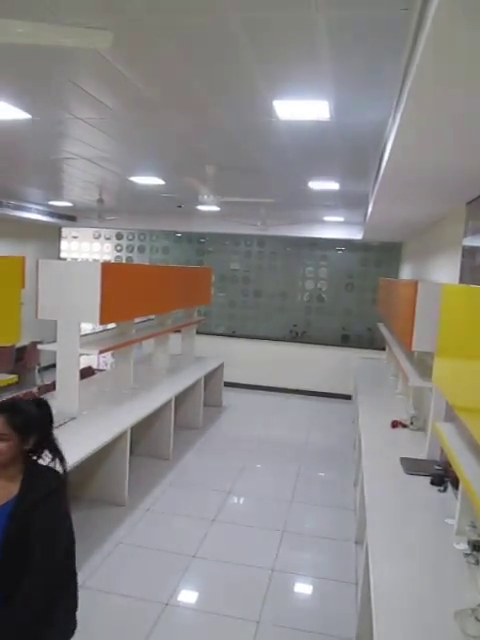



EXTRACTED





Fps: 0.71


In [32]:
from imutils.video import WebcamVideoStream
from imutils.video import FPS
from PIL import Image
from utils import visualization_utils_color as vis_util
from utils import label_map_util
import cv2
import os
import sys
import time
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
from google.colab.patches import cv2_imshow
from IPython.display import Image as img

tf.disable_v2_behavior()


# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = './model/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = './proto/label_map.pbtxt'

NUM_CLASSES = 1

# Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def face_detection():

    # Load Tensorflow model
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')

        sess = tf.Session(graph=detection_graph)

    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')

    # Actual detection.
    detection_classes = detection_graph.get_tensor_by_name(
        'detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    # Start video stream
    cap = r'./data/Frame.png'
    fps = FPS().start()

    while True:

        frame = cv2.imread(cap)

        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        expanded_frame = np.expand_dims(frame, axis=0)
        (boxes, scores, classes, num_c) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: expanded_frame})

        # print("boxes")
        # print(type(boxes))
        # print(boxes)
        # print("classes")
        # print(type(classes))
        # print(classes)
        # print("scores")
        # print(type(scores))
        # print(scores)

        output_directory = r'./Face Extracted'
        image_width = frame.shape[1]
        image_height = frame.shape[0]

        # get label and coordinates of detected objects
        output = []
        for index, score in enumerate(scores):
            label = category_index[int(classes[index][0])]['name']
            print(boxes[index])
            ymin, xmin, ymax, xmax = boxes[index][0]
            output.append((label, int(xmin * image_width), int(ymin * image_height),
                          int(xmax * image_width), int(ymax * image_height)))
        image_show = frame.copy()
        # Save images and labels
        for l, x_min, y_min, x_max, y_max in output:
            array = cv2.cvtColor(np.array(image_show), cv2.COLOR_RGB2BGR)
            image = Image.fromarray(array)
            cropped_img = image.crop((x_min, y_min, x_max, y_max))
            file_path = output_directory+'/Extracted.jpg'
            cropped_img.save(file_path, "JPEG",
                             icc_profile=cropped_img.info.get('icc_profile'))

        # Visualization of the detection
        vis_util.visualize_boxes_and_labels_on_image_array(
            frame,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=1,
            min_score_thresh=0.40)
        print("\n\nDETECTED")
        cv2_imshow(frame)

        print("\n\nEXTRACTED")
        display(img("./Face Extracted/Extracted.jpg"))
        print("\n\n")
        #cv2.imshow('Detection', frame)
        filename = r'./Face Detected/Detected.png'
        cv2.imwrite(filename, frame)
        fps.update()
        fps.stop()
        break
        '''
        if cv2.waitKey(1) == ord('q'):
            fps.stop()
            break
        '''
        # break

    print("Fps: {:.2f}".format(fps.fps()))
    fps.update()
    #cap.stop()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    face_detection()